In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

In [4]:
df=pd.read_excel("Japan_2000_2023.xlsx")

In [5]:
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,place,country,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,2023-03-02T07:19:01.487Z,32.5313,135.7405,16.123,4.5,mb,30.0,95.0,1.970,0.44,...,"135 km S of Shing?, Japan",Japan,earthquake,5.07,4.815,0.131,18.0,reviewed,us,us
1,2023-03-02T06:47:39.954Z,33.3315,139.4942,9.945,5.1,mww,65.0,77.0,0.344,0.49,...,"157 km SSE of Shimoda, Japan",Japan,earthquake,5.01,4.540,0.073,18.0,reviewed,us,us
2,2023-03-02T06:14:51.230Z,43.4055,147.2168,40.090,5.2,mb,91.0,116.0,3.299,0.81,...,"59 km SE of Shikotan, Russia",Russia,earthquake,8.74,6.763,0.024,558.0,reviewed,us,us
3,2023-02-28T15:48:02.842Z,35.6762,140.7823,43.894,4.5,mwr,27.0,139.0,2.261,0.65,...,"7 km SW of Hasaki, Japan",Japan,earthquake,6.74,5.915,0.089,12.0,reviewed,us,us
4,2023-02-28T11:12:09.077Z,32.9764,141.6939,10.000,5.2,mww,136.0,93.0,1.585,0.79,...,"272 km SSE of Katsuura, Japan",Japan,earthquake,6.71,1.847,0.083,14.0,reviewed,us,us


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11099 entries, 0 to 11098
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             11099 non-null  object 
 1   latitude         11099 non-null  float64
 2   longitude        11099 non-null  float64
 3   depth            11099 non-null  float64
 4   mag              11099 non-null  float64
 5   magType          11099 non-null  object 
 6   nst              7497 non-null   float64
 7   gap              10077 non-null  float64
 8   dmin             3806 non-null   float64
 9   rms              11021 non-null  float64
 10  net              11099 non-null  object 
 11  id               11099 non-null  object 
 12  updated          11099 non-null  object 
 13  place            11099 non-null  object 
 14  country          11099 non-null  object 
 15  type             11099 non-null  object 
 16  horizontalError  3278 non-null   float64
 17  depthError  

## DATA CLEANING


In [7]:
df.columns = df.columns.str.strip() # to remove all the leading/trailing spaces.


In [8]:
df['time']=pd.to_datetime(df['time']) # converting time column to Date and time formate

In [9]:
df['year']=df['time'].dt.year
df['month']=df['time'].dt.month
df['day']=df['time'].dt.day
df['hours']=df['time'].dt.hour

In [10]:
df.drop(columns=['time'],inplace=True)

In [11]:
df['Country']=df['place'].str.rsplit(",",n=1).str[0]

In [12]:
df['city']=df['Country'].str.rsplit(" ",n=1).str[-1]

In [13]:
df.drop(columns=['Country'],inplace=True)

In [14]:
df.isnull().sum() # counting missing values

latitude              0
longitude             0
depth                 0
mag                   0
magType               0
nst                3602
gap                1022
dmin               7293
rms                  78
net                   0
id                    0
updated               0
place                 0
country               0
type                  0
horizontalError    7821
depthError         3129
magError           7431
magNst             2126
status                0
locationSource        0
magSource             0
year                  0
month                 0
day                   0
hours                 0
city                  0
dtype: int64

In [15]:
df.drop(columns=['nst','horizontalError','net','id','locationSource','magSource','updated','magError','depthError','dmin','magType','gap','magNst'],inplace=True)

In [16]:
df

,latitude,longitude,depth,mag,rms,place,country,type,status,year,month,day,hours,city
0,32.5313,135.7405,16.123,4.5,0.44,"135 km S of Shing?, Japan",Japan,earthquake,reviewed,2023,3,2,7,Shing?
1,33.3315,139.4942,9.945,5.1,0.49,"157 km SSE of Shimoda, Japan",Japan,earthquake,reviewed,2023,3,2,6,Shimoda
2,43.4055,147.2168,40.090,5.2,0.81,"59 km SE of Shikotan, Russia",Russia,earthquake,reviewed,2023,3,2,6,Shikotan
3,35.6762,140.7823,43.894,4.5,0.65,"7 km SW of Hasaki, Japan",Japan,earthquake,reviewed,2023,2,28,15,Hasaki
4,32.9764,141.6939,10.000,5.2,0.79,"272 km SSE of Katsuura, Japan",Japan,earthquake,reviewed,2023,2,28,11,Katsuura
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11094,40.7200,143.7450,33.000,4.8,0.92,"191 km E of Hachinohe, Japan",Japan,earthquake,reviewed,2000,1,14,14,Hachinohe
11095,36.3890,140.6260,68.600,4.9,0.82,"8 km E of Hitachi-Naka, Japan",Japan,earthquake,reviewed,2000,1,12,2,Hitachi-Naka
11096,37.2800,141.5150,56.000,5.4,0.71,"50 km ESE of Namie, Japan",Japan,earthquake,reviewed,2000,1,9,4,Namie
11097,42.9440,145.4470,33.000,4.5,1.16,"43 km SSW of Nemuro, Japan",Japan,earthquake,reviewed,2000,1,6,8,Nemuro


In [17]:
df.drop(columns=['status','type','rms'],inplace=True)

In [18]:
df.dropna(subset=['place'],inplace=True)

In [19]:
df=df[df['country'] == 'Japan']

In [20]:
df.drop(columns=['country'],inplace=True)

C:\Users\HP\AppData\Local\Temp\ipykernel_17628\2452594854.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['country'],inplace=True)


In [21]:
df.reset_index(drop=True,inplace=True) #resetting the index
df

,latitude,longitude,depth,mag,place,year,month,day,hours,city
0,32.5313,135.7405,16.123,4.5,"135 km S of Shing?, Japan",2023,3,2,7,Shing?
1,33.3315,139.4942,9.945,5.1,"157 km SSE of Shimoda, Japan",2023,3,2,6,Shimoda
2,35.6762,140.7823,43.894,4.5,"7 km SW of Hasaki, Japan",2023,2,28,15,Hasaki
3,32.9764,141.6939,10.000,5.2,"272 km SSE of Katsuura, Japan",2023,2,28,11,Katsuura
4,35.8699,140.9309,46.248,4.7,"17 km NNE of Hasaki, Japan",2023,2,28,3,Hasaki
...,...,...,...,...,...,...,...,...,...,...
10465,40.7200,143.7450,33.000,4.8,"191 km E of Hachinohe, Japan",2000,1,14,14,Hachinohe
10466,36.3890,140.6260,68.600,4.9,"8 km E of Hitachi-Naka, Japan",2000,1,12,2,Hitachi-Naka
10467,37.2800,141.5150,56.000,5.4,"50 km ESE of Namie, Japan",2000,1,9,4,Namie
10468,42.9440,145.4470,33.000,4.5,"43 km SSW of Nemuro, Japan",2000,1,6,8,Nemuro


## General overview

#### 1) No. of earthquakes occured in japan between 2000 to 2023

In [22]:
df.shape[0]

10470

#### 2) What is the average number of earthquakes per year during this period?


In [23]:
quakes_per_year = df.groupby('year')['year'].count()
quakes_per_year.mean()

436.25

#### 3) What was the largest magnitude recorded, and where/when did it occur?

In [24]:
largest_mag_row=df.loc[df['mag'].idxmax()]
largest_mag_row
print(f' The largest magnitude recorded is {largest_mag_row['mag']} at {largest_mag_row['place']} on {largest_mag_row['day']}-{largest_mag_row['month']}-{largest_mag_row['year']}.')

 The largest magnitude recorded is 9.1 at 2011 Great Tohoku Earthquake, Japan on 11-3-2011.


#### 4) What was the deepest and shallowest earthquake? Where were they located?

In [25]:
deepest=df.loc[df['depth'].idxmax()]
shallow=df.loc[df['depth'].idxmin()]

deepest_depth=deepest['depth']
deepest_place=deepest['place']

shallow_depth=shallow['depth']
shallow_place=shallow['place']


print(f"The deepest earthquake had a depth of {deepest_depth} km, located at {deepest_place} on {deepest['day']}-{deepest['month']}-{deepest['year']}.")
print(f"The shallowest earthquake had a depth of {shallow_depth} km, located at {shallow_place} on {shallow['day']}-{shallow['month']}-{shallow['year']}.")

The deepest earthquake had a depth of 507.05 km, located at Izu_Islands, Japan region on 15-4-2022.
The shallowest earthquake had a depth of 0.6 km, located at off the east coast of Honshu, Japan on 27-7-2005.


### Descriptive and Exploratory Analysis

#### 5) What is the yearly trend of earthquake occurrences in Japan from 2000 to 2023?

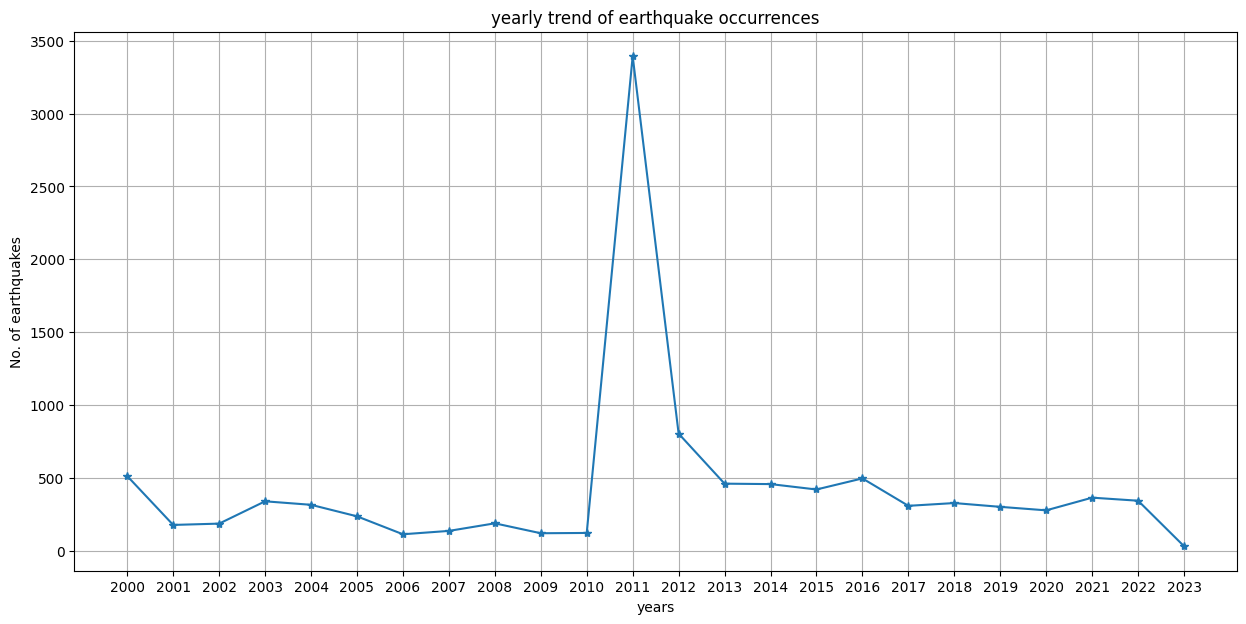

In [26]:
plt.figure(figsize=(15,7))
plt.plot(quakes_per_year.index,quakes_per_year.values, marker='*')
plt.grid(True)
plt.xlabel('years')
plt.ylabel('No. of earthquakes')
plt.title("yearly trend of earthquake occurrences")
plt.xticks(range(2000,2024))
plt.show()

#### 6) earthquake magnitude changed over the years

In [27]:
avg_mag = df.groupby('year')['mag'].mean()

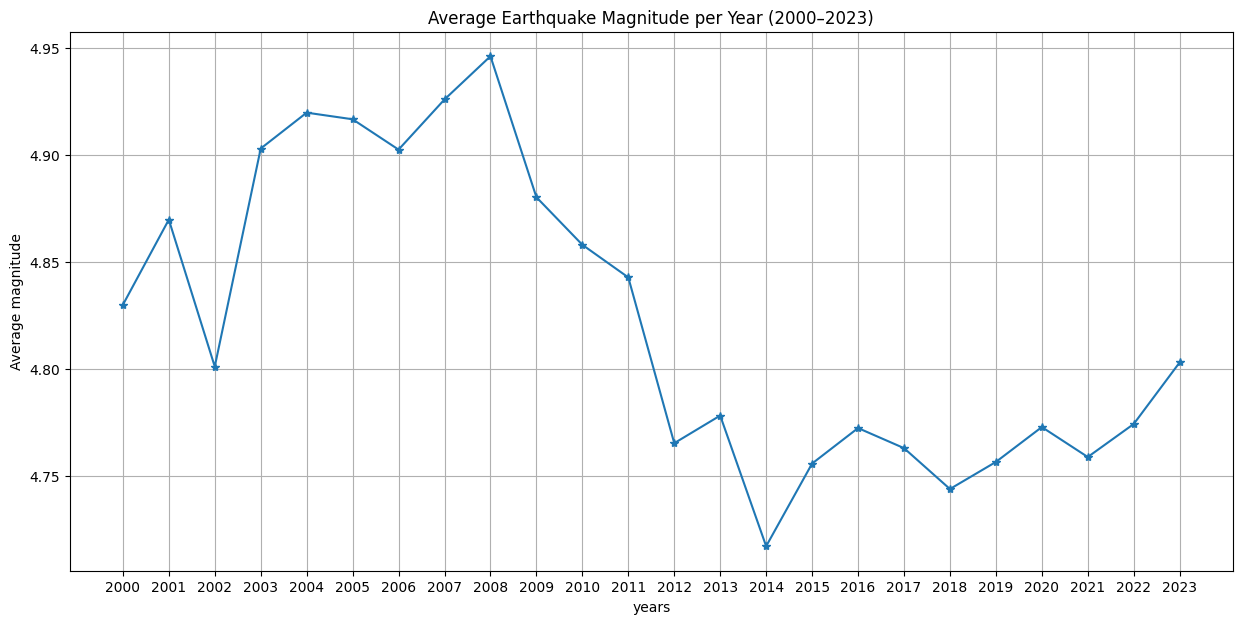

In [28]:
plt.figure(figsize=(15,7))
plt.plot(avg_mag.index,avg_mag.values, marker='*')
plt.grid(True)
plt.xlabel('years')
plt.ylabel('Average magnitude')
plt.title("Average Earthquake Magnitude per Year (2000–2023)")
plt.xticks(range(2000,2024))
plt.show()

#### 7) The most common magnitudes 


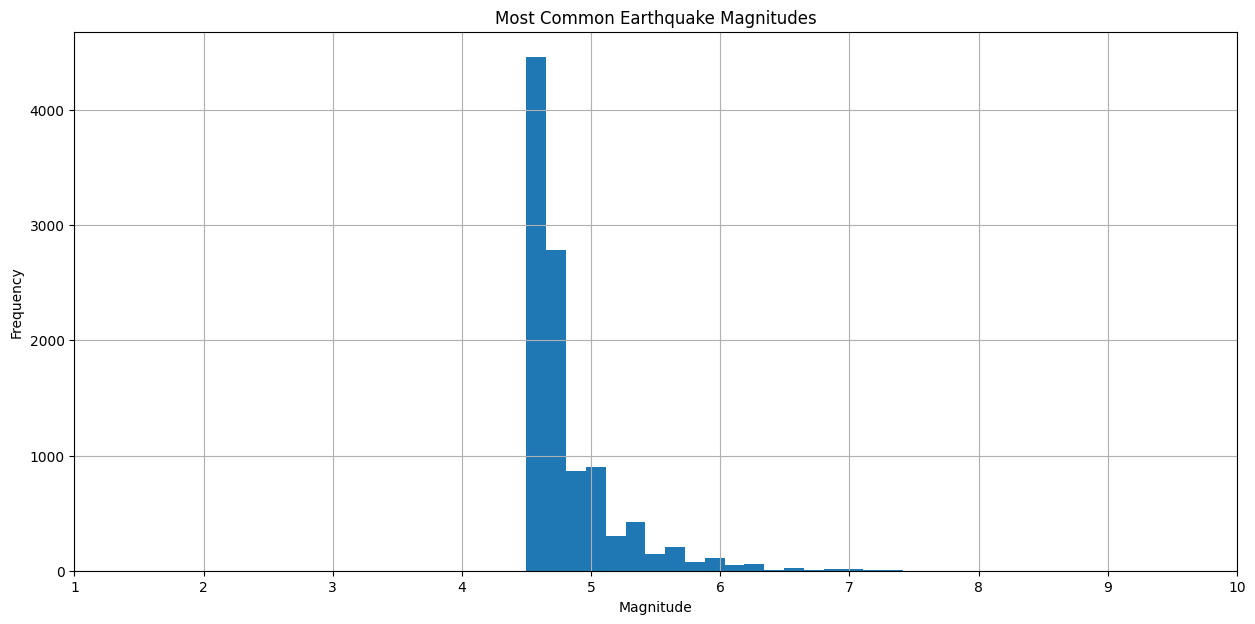

In [29]:
plt.figure(figsize=(15,7))
plt.hist(df['mag'], bins= 30)
plt.grid(True)
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.title("Most Common Earthquake Magnitudes")
plt.xticks(range(1,11))
plt.show()

In [30]:
df

,latitude,longitude,depth,mag,place,year,month,day,hours,city
0,32.5313,135.7405,16.123,4.5,"135 km S of Shing?, Japan",2023,3,2,7,Shing?
1,33.3315,139.4942,9.945,5.1,"157 km SSE of Shimoda, Japan",2023,3,2,6,Shimoda
2,35.6762,140.7823,43.894,4.5,"7 km SW of Hasaki, Japan",2023,2,28,15,Hasaki
3,32.9764,141.6939,10.000,5.2,"272 km SSE of Katsuura, Japan",2023,2,28,11,Katsuura
4,35.8699,140.9309,46.248,4.7,"17 km NNE of Hasaki, Japan",2023,2,28,3,Hasaki
...,...,...,...,...,...,...,...,...,...,...
10465,40.7200,143.7450,33.000,4.8,"191 km E of Hachinohe, Japan",2000,1,14,14,Hachinohe
10466,36.3890,140.6260,68.600,4.9,"8 km E of Hitachi-Naka, Japan",2000,1,12,2,Hitachi-Naka
10467,37.2800,141.5150,56.000,5.4,"50 km ESE of Namie, Japan",2000,1,9,4,Namie
10468,42.9440,145.4470,33.000,4.5,"43 km SSW of Nemuro, Japan",2000,1,6,8,Nemuro


#### 8) Which top 10 cities experienced the most earthquakes?

In [31]:
city_count=df.groupby('city')['city'].count().sort_values(ascending=False).head(10).reset_index(name='count')
city_count

,city,count
0,Namie,956
1,Izu_Islands,943
2,Ishinomaki,803
3,Hasaki,768
4,Iwaki,593
5,Miyako,517
6,?funato,490
7,Shimoda,434
8,Kamaishi,330
9,Katsuura,314


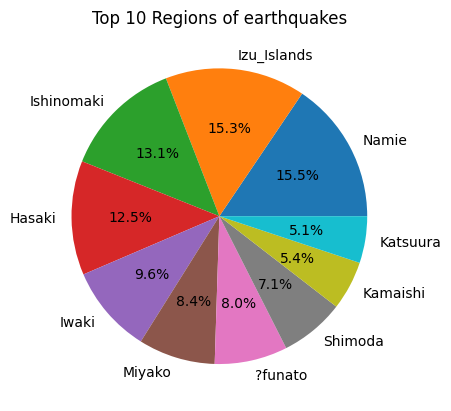

In [32]:
plt.pie(city_count['count'], labels=city_count['city'],autopct='%1.1f%%')
plt.title('Top 10 Regions of earthquakes')
plt.show()

### Spatial Analysis

#### 9) The geographical hotspots for earthquakes in Japan

In [33]:
m = folium.Map(location=[36,138.0], zoom_start=5, tiles='CartoDB positron')

In [34]:
heat_data = df[['latitude', 'longitude']].values.tolist()

In [35]:
HeatMap(heat_data, radius=8, blur=15, max_zoom=6).add_to(m)

In [36]:
m

#### 10) Pattern between depth and magnitude of earthquakes

In [37]:
correlation= df[['depth', 'mag']]

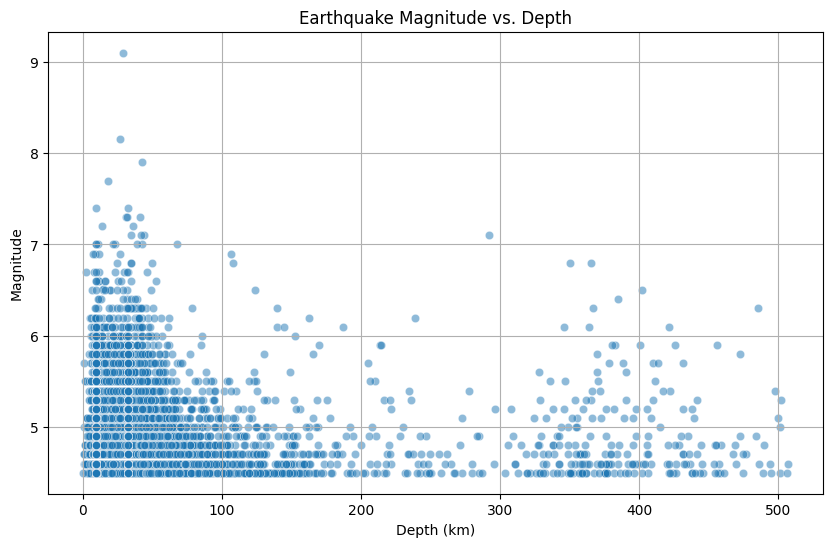

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=correlation, x='depth', y='mag', alpha=0.5)
plt.title('Earthquake Magnitude vs. Depth')
plt.xlabel('Depth (km)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()

In [39]:
cor =correlation['depth'].corr(correlation['mag'])
print(f"Correlation between depth and magnitude: {cor}")

Correlation between depth and magnitude: -0.003868255986820554


### Outliers events

#### 11) Which earthquakes are considered outliers in terms of magnitude and depth?

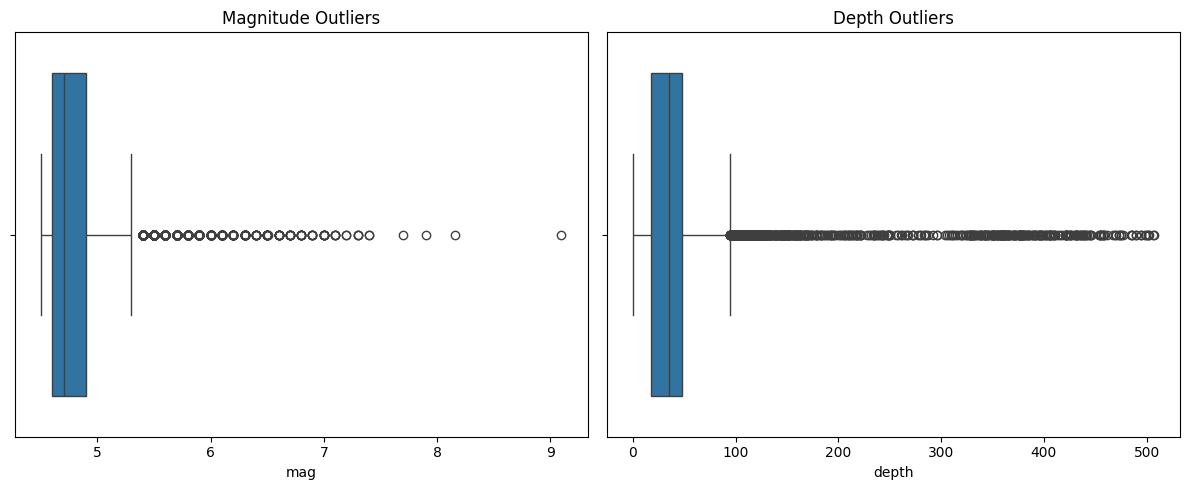

In [40]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=df['mag'])
plt.title('Magnitude Outliers')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['depth'])
plt.title('Depth Outliers')

plt.tight_layout()
plt.show()

#### 12) Percentage of strong earthquakes (magnitude >6).

In [41]:
strong_earthquake =len(df[df['mag'] > 6.0])

In [42]:
percentage_strong_earthquake=(strong_earthquake/len(df))*100

In [43]:
print(f"Earthquakes with magnitude greater than 6 are relatively rare, making up only about {percentage_strong_earthquake:.2f}% of the data, and are mostly identified as outliers in the distribution.")


Earthquakes with magnitude greater than 6 are relatively rare, making up only about 1.77% of the data, and are mostly identified as outliers in the distribution.


### Temporal Analysis

#### 13) Frequency of earthquake during Seasons.

In [44]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'

df['Season'] = df['month'].apply(get_season)

C:\Users\HP\AppData\Local\Temp\ipykernel_17628\1337967858.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Season'] = df['month'].apply(get_season)


In [45]:
Season=df.groupby('Season')['Season'].count().reset_index(name='count')
Season

,Season,count
0,Autumn,2077
1,Spring,4251
2,Summer,2362
3,Winter,1780


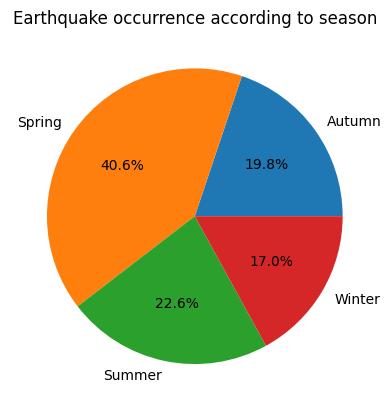

In [46]:
plt.pie(Season['count'],labels=Season['Season'],autopct='%1.1f%%')
plt.title('Earthquake occurrence according to season')
plt.show()

#### 14) What is the average time between earthquakes over the years?

In [47]:
df['date']=pd.to_datetime(df[['year','month','day']])

C:\Users\HP\AppData\Local\Temp\ipykernel_17628\2674267922.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date']=pd.to_datetime(df[['year','month','day']])


In [48]:
df=df.sort_values('date')

In [49]:
df['Time_Diff_Days'] = df['date'].diff().dt.days

In [50]:
average_gap = df['Time_Diff_Days'].mean()

In [51]:
average_gap

0.8080045849651352

In [52]:
print(f"The average time between earthquakes from {df['year'].min()} to {df['year'].max()} is approximately {average_gap:.2f} days.")

The average time between earthquakes from 2000 to 2023 is approximately 0.81 days.


#### 15) Earthquake Alert System

In [53]:
def check_for_alert(df):
    if df['mag'] >= 6.0:
        return "ALERT: Strong earthquake detected!"
    elif df['mag'] > 5.0 and df['depth'] < 30:
        return "WARNING: Shallow moderate earthquake — monitor for aftershocks."
    else:
        return "No alert"


df['Alert'] = df.apply(check_for_alert, axis=1)

print(df[['date', 'mag', 'depth', 'Alert']].tail(10))


        date  mag    depth                                              Alert
9 2023-02-14  4.5   10.000                                           No alert
8 2023-02-19  5.0  132.287                                           No alert
6 2023-02-25  6.0   50.181                 ALERT: Strong earthquake detected!
7 2023-02-25  4.6   70.371                                           No alert
5 2023-02-27  4.6   48.169                                           No alert
4 2023-02-28  4.7   46.248                                           No alert
3 2023-02-28  5.2   10.000  WARNING: Shallow moderate earthquake — monitor...
2 2023-02-28  4.5   43.894                                           No alert
1 2023-03-02  5.1    9.945  WARNING: Shallow moderate earthquake — monitor...
0 2023-03-02  4.5   16.123                                           No alert


In [54]:
summary = """
Key Findings:
- Total of {} earthquakes occurred in Japan from 2000 to 2023.
- Average of {:.2f} earthquakes per year.
- The most powerful earthquake had a magnitude of {:.1f}.
- The deepest earthquake occurred at {:.1f} km.
- Most seismic activity concentrated in top 10 cities including {}.
""".format(df.shape[0],quakes_per_year.mean(), largest_mag_row['mag'], deepest['depth'], ", ".join(city_count['city'].head(5)))

print(summary)



Key Findings:
- Total of 10470 earthquakes occurred in Japan from 2000 to 2023.
- Average of 436.25 earthquakes per year.
- The most powerful earthquake had a magnitude of 9.1.
- The deepest earthquake occurred at 507.1 km.
- Most seismic activity concentrated in top 10 cities including Namie, Izu_Islands, Ishinomaki, Hasaki, Iwaki.



In [55]:
df.to_csv("cleaned_earthquake_data.csv", index=False)
